
## Sammenligning av lettlest-bøker mot andre ungdomsbøker


In [1]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

# lager et referansekorpus

refurns = get_urns_from_text('./urnref.txt')

# voksenkorpus

vrefurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':80})
reference = [r[0] for r in vrefurns]

# Lager korpus

Dataene som brukes i sammenligningen kommer fra lister over URNer som ligger i fila `urner_lettlest.txt`, og fra listen over URN-er som ligger i fila `urnref.txt`.

For sammenligning av tekster fra Dewey ligger info om WebDewey [her](http://deweysearchno.pansoft.de/webdeweysearch/executeSearch.html?lastScheduleRecord=&lastTableRecord=&query=808.80384&catalogs=nb.no)

In [3]:
nb.get_corpus_text??

In [4]:
# f er målkorpuset

f = nb.get_corpus_text(urns, top=0, cutoff=0)
nb.normalize_corpus_dataframe(f)

True

In [5]:
# r er ungdomstekster

r = nb.get_corpus_text(refurns, top=0, cutoff=0)
nb.normalize_corpus_dataframe(r)

True

In [6]:
# v er voksenkorpuset

v = nb.get_corpus_text(reference, top=0, cutoff=0)
nb.normalize_corpus_dataframe(v)

True

## Kode for å beregne forholdet mellom tegn i en tekst

In [7]:
import pandas as pd

def ratio(frame, val1, val2):
    return pd.DataFrame(frame.dropna()[val1]/frame.dropna()[val2]).dropna()

In [8]:
def sammenlign(f, r, value, labels=['f','r'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.hist(f.transpose().dropna()[value], bins=10, density=True, color='blue', alpha=0.6);
    plt.hist(r.transpose().dropna()[value], bins=10, density=True, color='orange', alpha = 0.6);
    plt.legend(labels)
    plt.tight_layout()
    return

def plottlitt(f, r, labels=['lettlest','referanse'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    lett = plt.hist(f, bins=10, density=True, color='blue', alpha=0.6, label ='lett');
    ref = plt.hist(r, bins=10, density=True, color='orange', alpha = 0.6, label ='referanse');
    plt.legend(labels)
    plt.tight_layout()
    return
    

## Punktum og komma som kompleksitetsmarkører

Mange punktum (relativt) er koblet til setningslengde. Lange setninger gir også flere komma.


Her sjekker vi forholdet mellom antall punktum og komma - hvert dokument er knyttet til forholdstallet: $doc \leftarrow\frac{punktum}{komma}$. Jo mer punktum og færre komma, jo større blir verdien. Her forventes det at lettlest-tekster har større verdi enn referansen.

I histogrammet gir tallet på x-aksen forholdstallet, og y-aksen gir antallet dokument. Histogrammene er relativisert for å kunne gjøre sammenligning, siden referansekorpuset er større enn målkorpuset.


Ratioen forsterker effekten av at tekstene i lettlestkategorien
har flere punktum og færre komma (relativt sett) enn i referansekategorien

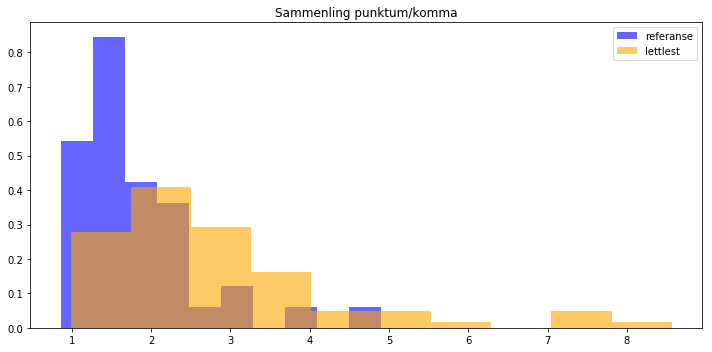

In [9]:
plottlitt(ratio(r.transpose(),'.',',')[0], ratio(f.transpose(),'.',',')[0], labels=['referanse','lettlest'], title="Sammenling punktum/komma")

#### Sammenligning av komma i de to kategoriene. Lettlest har færre komma.

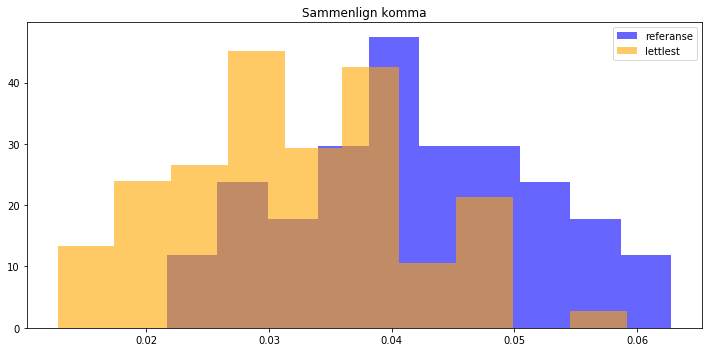

In [10]:
plottlitt(r.transpose().dropna()[','], f.transpose()[','], labels=['referanse','lettlest'], title="Sammenlign komma")

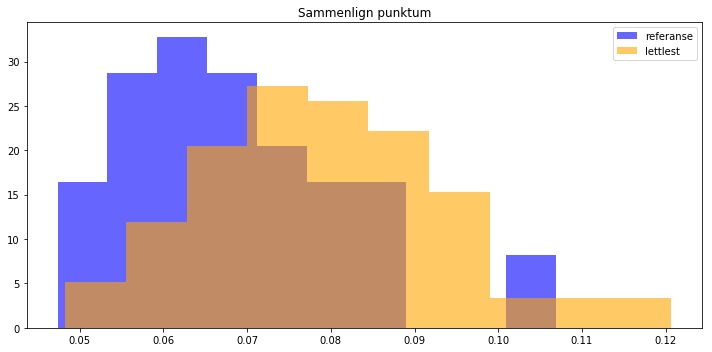

In [11]:
plottlitt(r.transpose().dropna()['.'], f.transpose()['.'], labels=['referanse','lettlest'], title="Sammenlign punktum")

#### Lettlest har flere punktum.

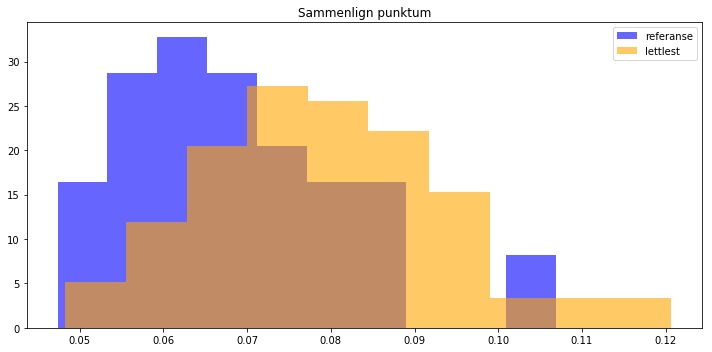

In [12]:
plottlitt(r.transpose().dropna()['.'], f.transpose()['.'], labels=['referanse','lettlest'], title="Sammenlign punktum")

# Sammenligning av andre ord

Forskjellige ord kan knyttes til forskjellige sjangre.

#### Argumenterende ord er ikke-eksisterende?

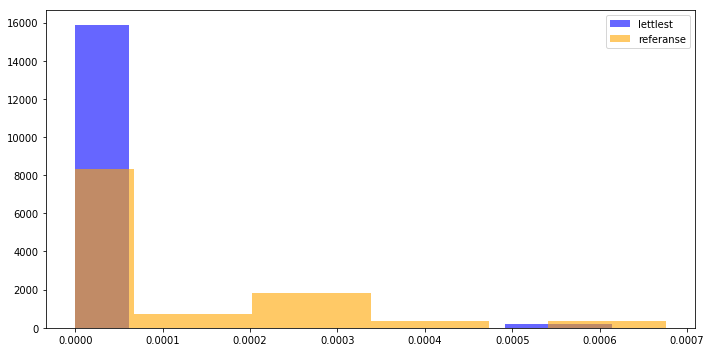

In [110]:
sammenlign(f, r, 'derfor',labels=['lettlest','referanse'])

Her kan vi også se på statistikken:

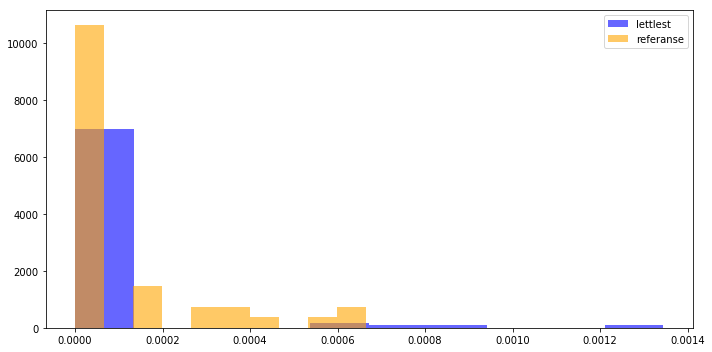

In [111]:
sammenlign(f, r, 'Derfor',labels=['lettlest','referanse'])

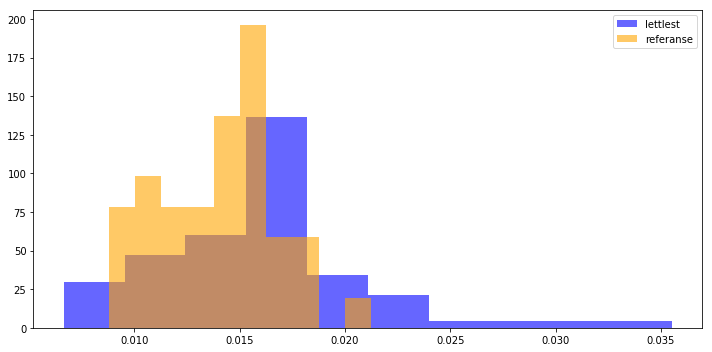

In [112]:
sammenlign(f, r, 'ikke', labels=['lettlest','referanse'])

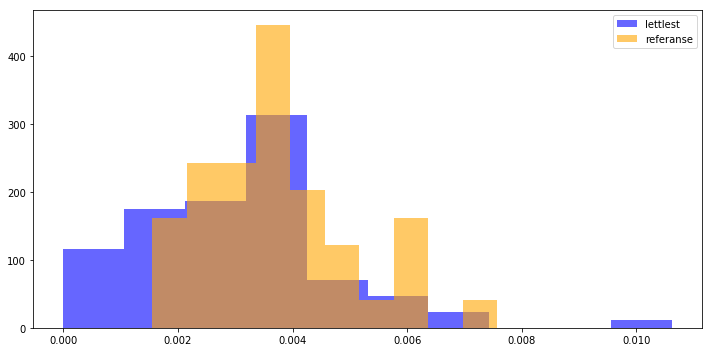

In [113]:
sammenlign(f, r, 'men', labels=['lettlest', 'referanse'])

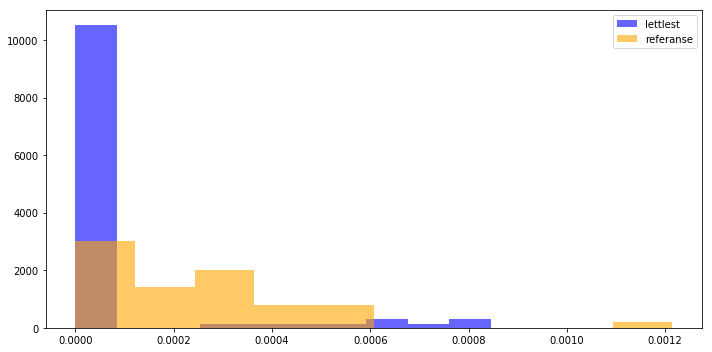

In [114]:
sammenlign(f, r, 'hvem', labels=['lettlest','referanse'])

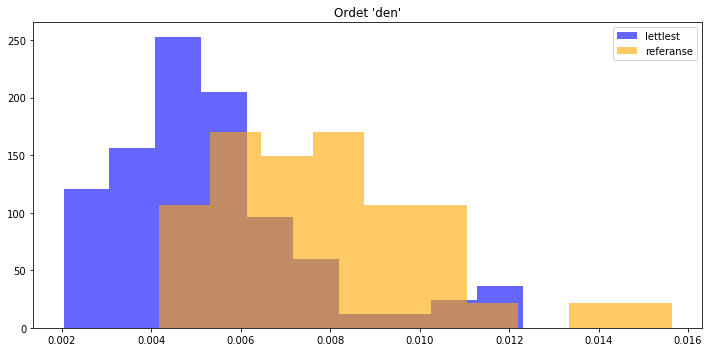

In [127]:
sammenlign(f, r, 'den', labels=['lettlest','referanse'], title="Ordet 'den'")

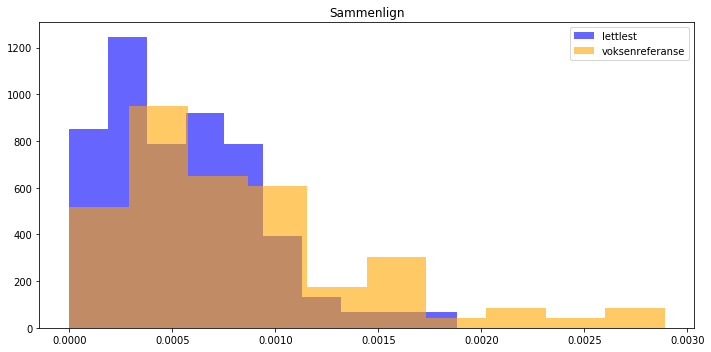

In [128]:
sammenlign(f, v, 'denne', labels=['lettlest','voksenreferanse'])

## Hvordan er det med ordlengde?

In [13]:
def gjennomsnittlig_ordlengde(f):
    sums = []
    for bok in f:
        sums.append(sum(map(len, list(f[bok].index)))/len(f[bok].index))
    return sum(sums)/len(sums)

def weighted(f):
    sums = []
    for bok in f:
        bokw = []
        for w in f[bok].index:
            try:
                factor = f[bok][f[bok]>0][w]
                res = len(w)*factor
                if res > 0:
                    bokw.append(res)
            except:
                True
        sums.append(sum(bokw)/len(bokw))
    return sum(sums)/len(sums)
                    

In [14]:
f['2010050408081'][f['2010050408081']>0]

!              0.002843
'              0.000388
(              0.000388
)              0.000388
*              0.000129
,              0.039418
-              0.016090
.              0.085234
...            0.000258
/              0.000065
1              0.000388
10.            0.000258
100            0.000129
101            0.000065
102            0.000065
104            0.000065
105            0.000065
106            0.000065
11             0.000065
13             0.000129
14             0.000065
15             0.000065
16             0.000065
18             0.000065
1840           0.000065
1996           0.000129
2              0.000065
20             0.000129
21             0.000065
22             0.000065
                 ...   
åsene          0.000323
åser           0.000065
ære            0.000065
ærene          0.000065
ætt            0.000388
ém             0.000065
øksa           0.000065
økte           0.000065
ønsker         0.000065
ønsket         0.000258
ørene          0

In [15]:
gjennomsnittlig_ordlengde(f)

7.440386680988192

In [16]:
gjennomsnittlig_ordlengde(v)

8.802032981135309

In [17]:
gjennomsnittlig_ordlengde(r)

8.0740431454419

In [155]:
weighted(v)

2.3471216262678883e-05

In [ ]:
f